<br>
<br>
## Beleg
# Mathematik III

Name: **Serhii Hamotskyi**<br>
Matrikelnummer: **21995**<br>
Studiengang: **BAIN5**<br> 
E-Mail: **shamotskyi@gmail.com**<br>

Datum: **07/02/2018**
<br>
<br>
<br>
<br>

# 1. Lineare Gleichungssysteme

Sympy: http://docs.sympy.org/latest/modules/solvers/solveset.html#sympy.solvers.solveset.linsolve 

Die Definition von eines Lineare Gleichungsyssteme ist:
$$ A\vec{x}=\vec{b} $$
$A$ ist der Koeffizientenmatrix, $\vec{x}$ ist der Vektor der Unbekannte $x_1 ... x_n$, und $\vec{b}$ ist der Lösungsvektor.
$\vec{x}$ ist gesucht.

In [79]:
from sympy import *
init_printing()
r,x,y,z=symbols("r x y z")

### 1.1 Lineare Glechungssysteme mit Parameter

In [80]:
A = Matrix([[5, -1, -3], [3, -2, 2], [2, 1, -4]]);
b = Matrix([10, 15, -3]);

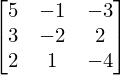

In [81]:
A

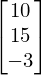

In [82]:
b

In [83]:
r = linsolve((A,b))
r

Überprüfen wir den Gleichung:

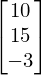

In [84]:
rr=Matrix(list(r)[0])
A*rr

In [85]:
A*rr==b

True

### 1.2 Stromstärken berechnung

Kirchhoffische Regeln:

#### I. Knotenregel
> In einem Knotenpunkt eines elektrischen Netzwerkes ist die Summe der zufließenden Ströme gleich der Summe der abfließenden Ströme. 
$$\sum^n_{k=1}I_k=0$$

#### II. Der Maschenregel
> Maschenregel: In jedem geschlossenem Stromkreis ist die Summe der Quellenspannungen gleich der Summe aller Spannungsabfälle oder die Summe aller Spannungen ist Null.
$$\sum^n_{k=1}U_k=0$$

<img src="ss.png" width="400" alt="Quellв">
<small>(Quelle: http://electroandi.ru)</small>

**Gegeben**:
$$
R_1=130\Omega; 
R_2=100\Omega;
R_3=150\Omega;
R_4=200\Omega;
R_5=80\Omega; \\
E_1=30V;
E_2=60V;
E_3=80V;\\
E_4=100V;
$$
**Gesucht**:
$$
I_1,I_2,I_3,I_4,I_5;
$$



#### 1. Knoten
Drei Knoten insgesamt, deshalb $n-1=2$ Gleichungen; Abfließende Ströme als negativ, zufließende als positiv.

$ I_3-I_1-I_4=0;$

$ I_5+I_1-I_2=0;$

#### 2. Maschen

I. $ R_1I_1+R_3I_3-R_5I_5=E_1+E_2;$

II. $ R_2I_2+R_5I_5=E_2$

III. $ R_3I_3+R_4I_4=E_3+E_4;$

In [86]:
i1, i2, i3, i4, i5=symbols("i1, i2, i3, i4, i5");

r1=130; r2=100; r3 = 150; r4 = 200; r5 = 80;
e1=30; e2=60; e3=80;  e4=100;

#i5=0.206

In [87]:
A = Matrix([[-1,0,1,-1,0], 
            [1,-1,0,0,1],
            [r1,0,r3,0,-r5],
            [0,r2,0,0,r5],
            [0,0,r3,r4,0]
           ]);
b = Matrix([0,0,e1+e3,e2,e3+e4]);

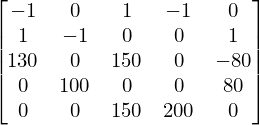

In [88]:
A

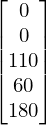

In [89]:
b

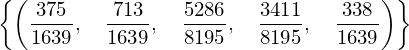

In [90]:
res=linsolve((A,b),i1,i2,i3,i4,e4)
res


Überprüfung:

In [91]:
A*Matrix(list(res)[0])==b

True

## 2. Nichtlineare Gleichungssysteme mit Anwendungen

### 2.1 Beispiel von der anwendung von <code>nonlinsolve()</code>

In [92]:
from sympy import *
init_printing()
x,y=symbols("x y")

In [93]:
system=[x*y-1,4*x**2+y**2-5];
ssymbols=[x,y]

system

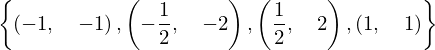

In [94]:
r=nonlinsolve(system,ssymbols)
r

Überprüfung:

In [95]:
(system[1].subs(x,list(r)[0][0]).subs(y,list(r)[0][1])==0)&(system[0].subs(x,list(r)[0][0]).subs(y,list(r)[0][1])==0)

True

### 2.2 Rohrleitungssysteme

<img src="2.png">

**Gegeben:**
$$ 
l_1=250m;
l_2=150m;
l_3=200m;\\
d=0.08m;\lambda=0.022;
$$
**Gesucht:**
$$Q_1,Q_2,Q_3$$

In [96]:
l1=250;l2=150;l3=200;
dm=0.08;l=0.022;

#### 2.2.1 Knotengleichungen
Ohne Konversion zum Sekunden:

$$\sum_{\textrm{i: hinein}}Q_i= \sum_{\textrm{i: aus}}Q_i \implies$$

I.$Q_1+Q_3=140 $

II.$Q_1=40+Q_2 $

III.$Q_2+Q_3=100 $

#### 2.2.2 Machengleichung mit fixiertes Lambda:
$\lambda=0.022;$

$a_1=\lambda\frac{l_1}{d^5}$
$a_2=\lambda\frac{l_2}{d^5}$
$a_3=\lambda\frac{l_3}{d^5}$

$$\sum \Delta p_i=0\implies \sum \pm a_iQ_i|Q_i|=0 \implies\\
a_1Q_1|Q_1|+a_2Q_2|Q_2|-a_3Q_3|Q_3|=0
$$



In [97]:
a1=l*l1/dm**5;
a2=l*l2/dm**5;
a3=l*l3/dm**5;

In [98]:
q1,q2,q3,la1,la2,la3=symbols("q1 q2 q3 la1 la2 la3",real=True)
ssymbols=[q1,q2,q3]

In [99]:
ss=[q1+q3-140/3600,
   q3+q2-100/3600,
   a1*(q1)*Abs(q1)+a2*q2*Abs(q2)-a3*q3*Abs(q3)]

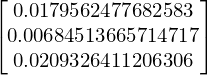

In [100]:
res=nsolve(ss,ssymbols,[1,1,1])
res

Überprüfen wir diese Werte:

In [101]:
check=[];
for eq in ss:
    eq=eq.subs(q1,res[0])
    eq=eq.subs(q2,res[1])
    eq=eq.subs(q3,res[2])
    check.append(eq)
check

#### 2.2.3 Maschengleichungen mit impliziertes Lambda

In [102]:
from sympy import *
q1,q2,q3,la1,la2,la3=symbols("q1 q2 q3 la1 la2 la3",real=True)

l1=250;l2=150;l3=200;
dm=0.08;
v=10**(-6);
k=0.00005;

a1=la1*l1/dm**5;
a2=la2*l2/dm**5;
a3=la3*l3/dm**5;

k1=q1+q3-140/3600;
k2=q3+q2-100/3600;
m=a1*(q1)*Abs(q1)+a2*q2*Abs(q2)-a3*q3*Abs(q3);

Re1=(4*Abs(q1))/(pi*dm*v);

ins1=(
    (2.51/
     (Re1*sqrt(la1))
    ) +
    k/(3.71*dm)
)
    
zg1 = (1/sqrt(la1))+2*log(ins1,10);

zg2=zg1.subs(la1,la2);
zg2=zg2.subs(q1,q2);

zg3=zg1.subs(la1,la3);
zg3=zg3.subs(q1,q3);

In [103]:
symbols=[q1,q2,q3,la1,la2,la3]
eqs=[k1,k2,m,zg1,zg2,zg3]
values=[0.01,0.001,0.01,0.022,0.022,0.022] # die wir haben oben geschätzt

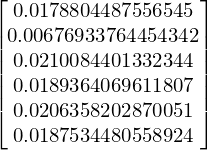

In [104]:
rn=nsolve(eqs,symbols,values)
rn

Überprüfung:

In [105]:
ch=[]
for eq in eqs:
    eq=eq.subs(q1,rn[0])
    eq=eq.subs(q2,rn[1])
    eq=eq.subs(q3,rn[2])
    eq=eq.subs(la1,rn[3])
    eq=eq.subs(la2,rn[4])
    eq=eq.subs(la3,rn[5])
    eq=eq.evalf()
    
    ch.append(eq)
ch


## 3. Newton-Interpolation und Spline-Interpolation

**Interpolation** ist der Verfahren, das zu diskreten Daten eine Funktion findet, die diese Daten abbildet. Wird genützt, z.B., wenn nur einige Punkten eines Funktion bekannt sind, oder um ein Funktion zu finden, der irgendwelche physicalische Prozesse (die nur durch Messpunkten bekannt sind) darstellt.

**Polynomial interpolation** ist ein Verfahren, wobei die Punkten werden mit einem Polynom interpoliert.

**Spline interpolation** ist das gleiche, aber mit Hilfe von Splines (Polynome zwischen Knoten, die miteinander harmonisch verbunden sind)

### Polynomial interpolation

In [106]:
from sympy import *
init_printing()
x,y=symbols("x y")

In [107]:
points=[(1,2),(22,9),(23,98)];
points

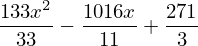

In [108]:
pol = interpolate(points,x)
pol

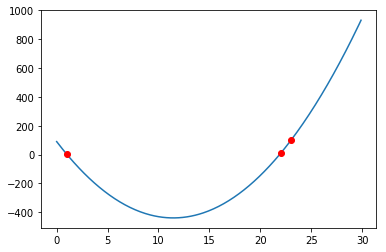

In [109]:
import matplotlib.pyplot as p
import numpy as n

t1=n.arange(0.0,30.0,0.1)
t2=[]
for i in t1:
    t2.append(pol.subs(x,i))

p.plot(t1,t2)
p.plot(*zip(*points),'ro')
p.show()

### Spline interpolation

In [110]:
DataPointsDomain = [0,1,2,3,4,5]
DataPointsRange =  [3,6,5,7,9,1]
x = symbols('x')
s = interpolating_spline(3, x, DataPointsDomain, DataPointsRange)

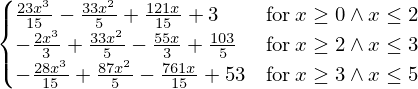

In [111]:
s

In [112]:
laIp=lambdify(x,s);
xx = n.arange(0., 5, 0.05)
y = []
for i in range(len(xx)):
   y.append(laIp(xx[i]));
s.subs(x,4.9)

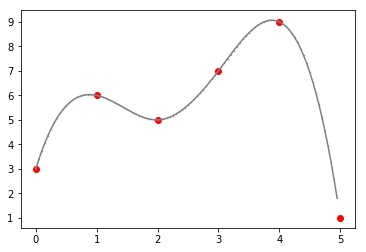

In [113]:
p.plot(DataPointsDomain,DataPointsRange, 'ro');
p.plot(xx,y,c='grey', marker='.', ms=1)
p.show()

### 4. Standortproblem


In [114]:
import numpy as n
from random import random
from random import randint
import math
from math import sqrt
from matplotlib import pyplot as p
from matplotlib import colors,style


### 4.1 Unfallorte
Generieren die Unfallorte, jeder mit zufällige:
* $x,y$ Koordinaten
* $w$ - Unfallwahrscheinlichkeit
* Hubschrauberstandort -- jetzt, keine

In [115]:
nOfPoints=400;
nOfAP=4;

In [116]:
# X,Y und UnfallWahrscheinlichkeit,current_airport
points=[]
for i in range(nOfPoints):
    points.append([randint(0,100),randint(0,100),randint(0,100),nOfAP+1])
norm=colors.Normalize(vmin=0, vmax=nOfAP);
p.gray()
x,y,w,a=zip(*points);
p.grid();
p.scatter(x,y,w,norm(a),marker='o',linewidth='1',edgecolor='black')

Hier, die Größe ist die Unfallwahrscheinlichkeit:

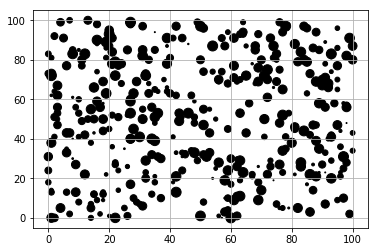

In [117]:
# https://matplotlib.org/users/colormaps.html more about colorschemes and normalization
p.show()

### 4.2 Hubschauberstandorte
Zufällig zugeordnet

In [118]:
aps=[]
for i in range(nOfAP):
    currPoint=randint(0,nOfPoints-1); 
    aps.append([points[currPoint][0],points[currPoint][1]]);
x,y,w,a=zip(*points);
xa,ya=zip(*aps);
p.grid();
p.scatter(x,y,w,norm(a),marker='o',linewidth='1',edgecolor='black')
p.scatter(xa,ya,c='yellow',marker='*',s=200,linewidth='1',edgecolor='black',alpha=0.9)

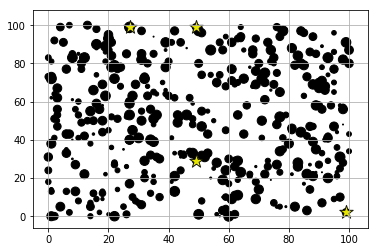

In [119]:
p.show()

### 4.3 Funktionen, die werden gebraucht

In [120]:
# Distance between X and Y
def dist(x,y):
    res=sqrt(pow((x[1]-y[1]),2) + pow((x[0]-y[0]),2))
    rr=float(res)
    return rr;

# Tell the points the closest airport to them:
def PtoA(points,aps):
    # For each point, look to which of the airports its the closes, and assign it to it
    for i in range(len(points)):
    #    print(i, ": Iterating point ", i, " with coords ", points[i][0],points[i][1])
        # max distance = 100
        m=1000;
        for j in range(len(aps)):
    #        print("  ",j,": Iterating airport",j," with coords ", aps[j][0],aps[j][1])
            d=dist(points[i],aps[j]);
    #        print("  Distance between them is ",d)
            if d<m:
    #            print("      current m is:",m);
    #            print("      current d is:",d);
    #            print(">>      d<m");
                m=d;
                # We set the closest airport in the array
                points[i][3]=j;
    return(points);

# Center of mass of points given by array of x,y,w
def cm(x,y,w):
    cmysum,cmxsum=0,0;
    weightsum=sum(w)
    
    for i in range(len(x)):
        cmxsum+=x[i]*w[i]
        cmysum+=y[i]*w[i]
    cmy=cmysum/weightsum;
    cmx=cmxsum/weightsum;
    return(cmx,cmy)

#Which points belong to which airports to separate array
def AtoP(points,aps):
#apoints=[[]]*nOfAP;
    apoints=[]
    for i in range(len(aps)):
        apoints.append([]);

    for i in range(len(points)):
        apoints[points[i][3]].append(points[i]);
    return(apoints);

def calculate_cmasses(apoints):
    cmasses=[];
    for a in apoints:
        if a:
            x,y,w,a=zip(*a);
            cmx,cmy=cm(x,y,w);
            cmasses.append([cmx,cmy]);
    return cmasses

### 4.4 Clusters
Jedes Punkt wird einem Hubschrauberstandort zugeordnet und passend gefärbt:

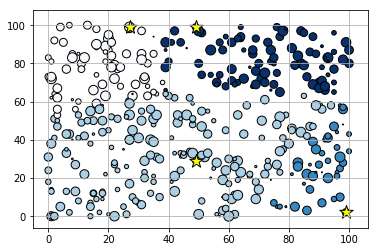

In [121]:
points=PtoA(points,aps);

x,y,w,a=zip(*points);
xa,ya=zip(*aps);
p.grid();
p.scatter(x,y,w,norm(a),marker='o',linewidth='1',edgecolor='black',cmap='Blues')
p.scatter(xa,ya,c='yellow',marker='*',s=200,linewidth='1',edgecolor='black',alpha=1)
p.show()

### 4.5 Zentroide
Wir finden die Zentroide von jedes Cluster.

In [122]:
apoints=AtoP(points,aps);
cmasses=calculate_cmasses(apoints);

# Plot all points and all airports
cmx,cmy=zip(*cmasses);
xa,ya=zip(*aps);
x,y,w,a=zip(*points);
norm=colors.Normalize(vmin=0., vmax=float(nOfAP*2));
p.grid();
p.scatter(x,y,w,norm(a),marker='o',linewidth='1',edgecolor='black',cmap='Blues')
p.scatter(xa,ya,c='yellow',marker='*',s=200,linewidth='1',edgecolor='black',alpha=1)
p.scatter(cmx,cmy,c='xkcd:hot pink',marker='H',s=100,linewidth='1',edgecolor='black')

**Hubschrauberstandorte:** Gelbe Sternen
**Zentroide:** Rosa Vielecken

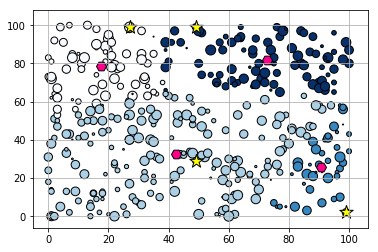

In [123]:
p.show()

### 4.6 Optimierung
Jedes iteration, wir verlegen den Hubschauber in der Zentroide und schätzen die neue Zetroide, bis zum Iteration, wo es  keine Bewegung gibt.

In [124]:
universe=[];
eps=0;
while eps==0:
    # Add the beginning
    universe.append([[x,y,w,a],[cmx,cmy],[xa,ya]]);
    bew=0;
    # Airport in Centroid for all centroids
    for i in range(len(cmasses)):
        if (aps[i][0]!=cmasses[i][0]):
            #print(">",aps[i][0],cmasses[i][0]);
            aps[i][0]=cmasses[i][0];
            bew=1;
        if (aps[i][1]!=cmasses[i][1]):
            aps[i][1]=cmasses[i][1];
            bew=1;
    # If there was no movement, it's over
    if bew==0:
        eps=1;
    # We update to which airport belong the points, based on the new position of the airports
    points=PtoA(points,aps);
    apoints=AtoP(points,aps);
    cmasses=calculate_cmasses(apoints);
    
    cmx,cmy=zip(*cmasses);
    x,y,w,a=zip(*points);
    xa,ya=zip(*aps)

### 4.7 Resultaten

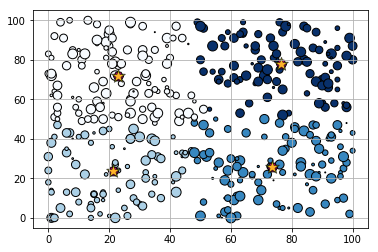

In [125]:
# Plot all points and all airports
cmx,cmy=zip(*cmasses);
x,y,w,a=zip(*points);
xa,ya=zip(*aps);

norm=colors.Normalize(vmin=0., vmax=float(nOfAP*2));

p.grid();
p.scatter(x,y,w,norm(a),marker='o',cmap='Blues',linewidth='1',edgecolor='black')
p.scatter(cmx,cmy,c='xkcd:hot pink',marker='H',s=100,linewidth='1',edgecolor='black')
p.scatter(xa,ya,c='yellow',marker='*',s=200,linewidth='1',edgecolor='black',alpha=0.7)
p.show()
#universe

### 4.8 Visualisation der Schritte

Out of 15 , we're at 0

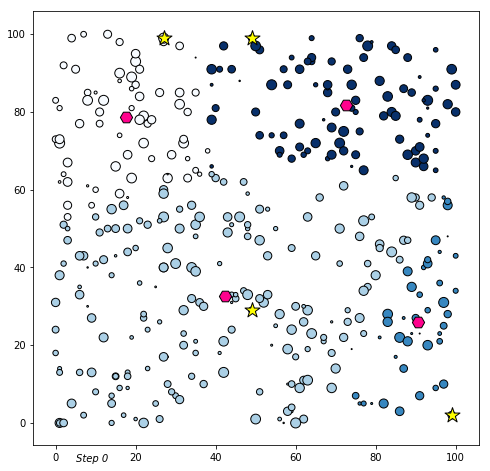

Out of 15 , we're at 0Out of 15 , we're at 0Out of 15 , we're at 1Out of 15 , we're at 2Out of 15 , we're at 3Out of 15 , we're at 4Out of 15 , we're at 5Out of 15 , we're at 6Out of 15 , we're at 7Out of 15 , we're at 8Out of 15 , we're at 9Out of 15 , we're at 10Out of 15 , we're at 11Out of 15 , we're at 12Out of 15 , we're at 13Out of 15 , we're at 14

In [126]:
import numpy as np;
import matplotlib.pyplot as plt;
from matplotlib.animation import FuncAnimation
from matplotlib import rc

fig = plt.figure(figsize=(8,8))
ax = plt.axes(xlim=(20,80),ylim=(20,80))

def update(i):
    global universe;
    ax.clear()
    scatter=ax.scatter(universe[i][0][0],universe[i][0][1],universe[i][0][2],norm(universe[i][0][3]),marker='o',cmap='Blues',linewidth='1',edgecolor='black')
    scatter=ax.scatter(universe[i][2][0],universe[i][2][1],c='yellow',marker='*',s=250,linewidth='1',edgecolor='black')
    scatter=ax.scatter(universe[i][1][0],universe[i][1][1],c='xkcd:hot pink',marker='H',s=150,linewidth='1',edgecolor='black')
    scatter=ax.text(5, -10, 'Step '+str(i), style='italic')
    print("Out of",len(universe),", we're at ",end='')
    print(i,end='');
    return scatter;

anim = FuncAnimation(fig, update, interval=500,frames=len(universe))
plt.show() 
from IPython.display import HTML,Image
rc('animation', html='html5')

anim

In [127]:
anim

# 5. Differentialgleichungen 1. und 2. Ordnung

In [128]:
from sympy import *
from sympy import Derivative as d
init_printing()

In [129]:
y=Function('y')
x=Symbol('x')
z=Symbol('z')

## 5.1 Gleichungen 1. Ordnung
### 5.1.1 Trennung der Veranderlichen

In [130]:
from sympy import *
from sympy import Derivative as d
init_printing()

In [131]:
x=Symbol('x')
y=Symbol('y')

$$y''=7x^2e^{-y}$$

In [132]:
gleichung=Eq(d(y(x)),7*x**2/E**y(x))

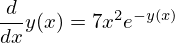

In [133]:
gleichung

Wir trennen die Veränderlichen:
$$ \frac{dx}{dy}=7x^2e^{-y(x)} $$
$$ e^ydy=7x^2dx $$
und integrieren beide Seiten:

In [134]:
integrate(E**y,y)

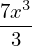

In [135]:
r=integrate(7*x**2,x)
r

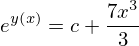

In [136]:
y=Function('y')
c=Symbol('c')
fin=Eq(E**y(x),r+c)
fin

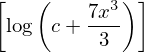

In [137]:
solve(fin,y(x))

Überprüfung:

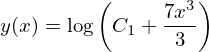

In [138]:
dsolve(gleichung)

### 5.1.2 Integrations Faktor

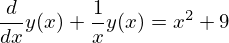

In [139]:
y=Function('y')
c=Symbol('c')
x=Symbol('x')

gl=Eq(d(y(x))+y(x)/x,x**2+9)
gl

Integrationsfaktor:

In [140]:
ifa=E**(integrate(1/x,x))
ifa

Nach Transofrmierungen wir becommen:
$$(xy)'=x*(x^2+9)$$
$$(xy)'=(x^3+9x)$$
Wir integrieren beide Seiten:
$$\int{(xy)'}=xy$$

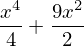

In [141]:
ii=integrate((x**3+9*x),x)
ii

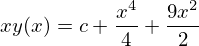

In [142]:
ii=ii+c #integration

iii=Eq(x*y(x),ii)
iii

Wir teilen beide Seiten nach x:

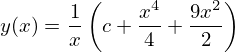

In [143]:
ii=ii/x;
iiii=Eq(y(x),ii)
iiii

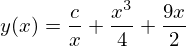

In [144]:
iiii=simplify(iiii)
iiii

Überprüfung:

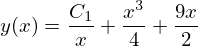

In [145]:
auto=dsolve(gl)
auto

## 5.2 Gleichungen 2. Ordnung
###  Complexen Nullstellen der charakteristischen Gleichung

$$y''+y=sin(5x) $$
$$y(0)=1$$
$$y'(0)=2$$

#### 5.2.1 Allgemeine lösung


Allgemeine Lösung: $$y''+y=0$$

In [146]:
from sympy import *
from sympy import Derivative as d
init_printing()

D=Symbol("D")
eq=D**2+1;
eq


In [147]:
roots=solve(eq)
roots

=> $$(D^2+1)y=0$$
$$(D+i)(D-i)y=0$$

Seit
$$D-\lambda_i=e^{\lambda_ix}De^{-\lambda_ix}$$
$$y=c_1e^{\lambda_1x}+c_2e^{\lambda_2x}$$

In unserem Fall,
$$y_h=c_1e^{-ix}+c_2e^{ix}$$


#### 5.2.2 Spezielle Lösung 
$$y''+y=sin(5x)$$

Von der rechte Seite, wir wissen dass $y_s(x)$ die Form $Acos(5x)+Bsin(5x)$ hat

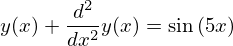

In [148]:
gl=Eq(d(d(y(x)))+y(x),sin(5*x))
gl

In [149]:
A,B=symbols("A B")
form=A*cos(5*x)+B*sin(5*x)
form

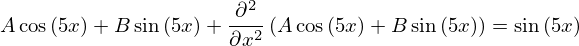

In [150]:
ddform=gl.subs(y(x),form)
ddform

In [151]:
ddform=ddform.doit()
ddform=ddform.simplify()
ddform

Daher kriegen wir den Gleichung
$$-24A=0;\\ -24B=1 \\\implies$$

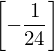

In [152]:
bb = solve(-24*B-1,B)
bb

$$A=0;B=-1/24$$
$$\implies$$
$$y_s=-\frac{1}{24}sin(5x)$$

#### 5.2.3 Lösung

$$y=y_s+y_h $$
$$y=-\frac{1}{24}sin(5x)+c_1e^{-ix}+c_2e^{ix}$$

Überprüfung:

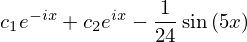

In [153]:
c1,c2=symbols("c1 c2")
full=bb[0]*sin(5*x)+c1*E**(-I*x)+c2*E**(I*x)
full

$$y''+y=sin(5x)$$

In [154]:
d(d(full,x),x).doit()+full

### Berechnung von $c_1,c_2$ 
$$y''+y=sin(5x)$$
$$y(0)=1;\\y'(0)=2$$

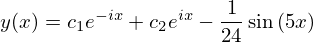

In [155]:
c1,c2=symbols("c1 c2")
full=bb[0]*sin(5*x)+c1*E**(-I*x)+c2*E**(I*x)

e1=full
Eq(y(x),e1)

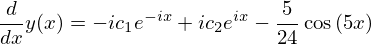

In [156]:
e2=d(e1,x).doit()
Eq(d(y(x),x),e2)

#### Teillösungen
Wir haben zwei Gleichungen. In beidem,
$$y(0)=1;\\y'(0)=2$$

In [157]:
e1=e1.subs(x,0)
eq1=Eq(e1,1)
eq1

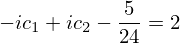

In [158]:
e2=e2.subs(x,0)
eq2=Eq(e2,2)
eq2


Wir lösen den Gleichungssystem

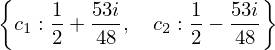

In [159]:
res=solve([eq1,eq2],[c1,c2])
res

Und für dem Fall 
$$y(0)=1;\\y'(0)=2$$
wir bekommen die Folgende $y(x)$: 

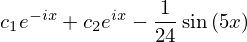

In [160]:
full

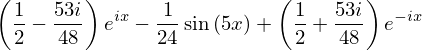

In [161]:
full=full.subs(c1,res[c1])
full=full.subs(c2,res[c2])
full

Überprüfung:

In [162]:
full.subs(x,0).simplify()

In [163]:
d(full,x).doit().subs(x,0).simplify()

### 5.2.2 Die Gleichung $y''-4y'+4y=e^{2x}$
#### 5.2.2.1 Allgemeine Lösung
$y''-4y'+4y=0$

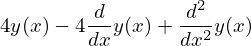

In [164]:
eq=d(d(y(x),x),x)-4*d(y(x),x)+4*y(x);
eq

In [165]:
l=Symbol("l")
r=l**2-4*l+4
lamb=solve(r)
lamb

$\implies \lambda_{1,2}=2$

In [166]:
c1,c2=symbols("c1,c2")
allg=c1*x*E**(2*x)+c2*E**(2*x)
allgs=Eq(y(x),c1*x*E**(2*x)+c2*E**(2*x))
#a2=c1*x*E**(2*x)+c2*E**(2*x)
allgs

$y_h=c_1xe^{2x}+c_2e^{2x}$

#### 5.2.2.2 Spezielle Lösung
$y''-4y'+4y=e^{2x}$

Ansatz $y(x)=x^2Ae^{2x}$

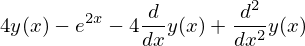

In [167]:
A=symbols("A")
ans=x**2*A*E**(2*x)
#ans=x*A*E**(2*x)
eq=d(d(y(x),x),x)-4*d(y(x),x)+4*y(x)-E**(2*x)
eq

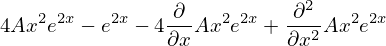

In [168]:
seq=eq.subs(y(x),ans)
seq

In [169]:
seq=seq.doit()
seq

In [170]:
seq.simplify()

In [171]:
#solve(seq,A)[0].doit().simplify()
solve(seq,A)

$A=0.5 \implies $

In [172]:
ys=ans.subs(A,1/2)
ys

$y=y_h+y_s \implies$

In [173]:
f=ys+allg
f

Überprüfung:

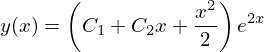

In [174]:
dsolve(eq)

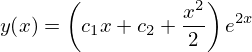

In [175]:
C1,C2=symbols("C1 C2")
ff=Eq(y(x),f)
res=dsolve(eq).subs(C2,c1).subs(C1,c2)
res

In [176]:
ff=ff.simplify()
ff

In [177]:
ff==res

True